In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("train_LZdllcl.csv")
test_df = pd.read_csv("test_2umaH9m.csv")

In [3]:
# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# Outliers_to_drop = detect_outliers(train_df,2,["Age","SibSp","Parch","Fare"])

In [4]:
train_df.info()
print("-----------------------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB
-------------

In [5]:
train_df.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [6]:
missing_val = pd.concat([train_df.isnull().sum(), test_df.isnull().sum()], axis=1, keys=['Train', 'Test'])
missing_val[missing_val.sum(axis=1) > 0]

,Train,Test
education,2409,1034.0
previous_year_rating,4124,1812.0


In [7]:
train_df['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [8]:
train_df['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [9]:
train_df['education'] = train_df['education'].replace(np.nan, 'Unknown', regex=True)
train_df['previous_year_rating'] = train_df['previous_year_rating'].replace(np.nan, '0', regex=True)

In [10]:
missing_val = pd.concat([train_df.isnull().sum(), test_df.isnull().sum()], axis=1, keys=['Train', 'Test'])
missing_val[missing_val.sum(axis=1) > 0]

,Train,Test
education,0,1034.0
previous_year_rating,0,1812.0


# EDA

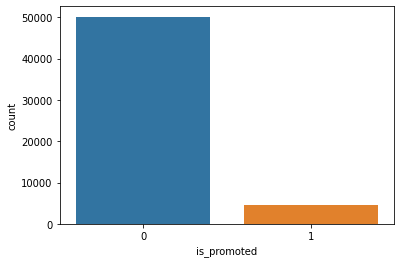

In [11]:
sns.countplot(x='is_promoted', data=train_df)

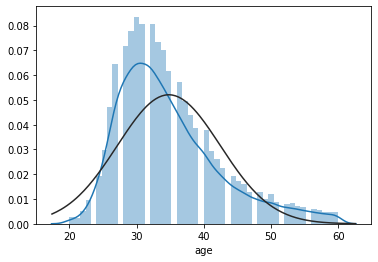

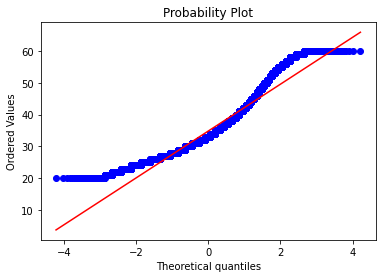

In [12]:
sns.distplot(train_df['age'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df['age'], plot=plt)

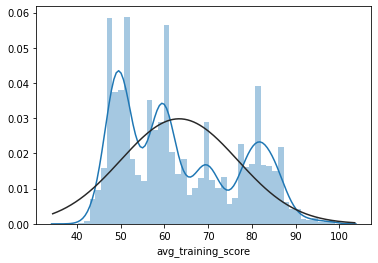

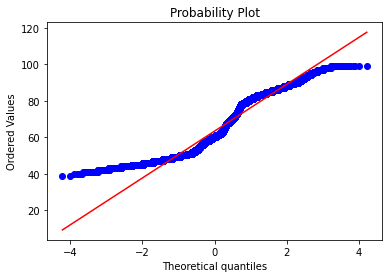

In [13]:
sns.distplot(train_df['avg_training_score'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df['avg_training_score'], plot=plt)

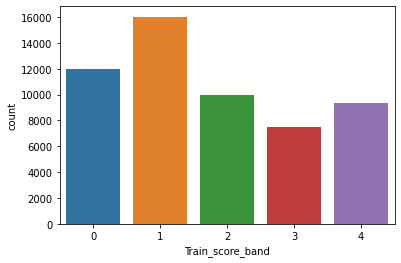

In [14]:
train_df['Train_score_band']=0
train_df.loc[train_df['avg_training_score']<=50,'Train_score_band']=0
train_df.loc[(train_df['avg_training_score']>50)&(train_df['avg_training_score']<=60),'Train_score_band']=1
train_df.loc[(train_df['avg_training_score']>60)&(train_df['avg_training_score']<=70),'Train_score_band']=2
train_df.loc[(train_df['avg_training_score']>70)&(train_df['avg_training_score']<=80),'Train_score_band']=3
train_df.loc[train_df['avg_training_score']>80,'Train_score_band']=4
sns.countplot(x='Train_score_band', data=train_df)

In [15]:
train_df['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [16]:
train_df['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [17]:
train_df['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Unknown              2409
Below Secondary       805
Name: education, dtype: int64

In [18]:
train_df['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [19]:
train_df['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [20]:
train_df['no_of_trainings'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

In [21]:
train_df['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
0       4124
Name: previous_year_rating, dtype: int64

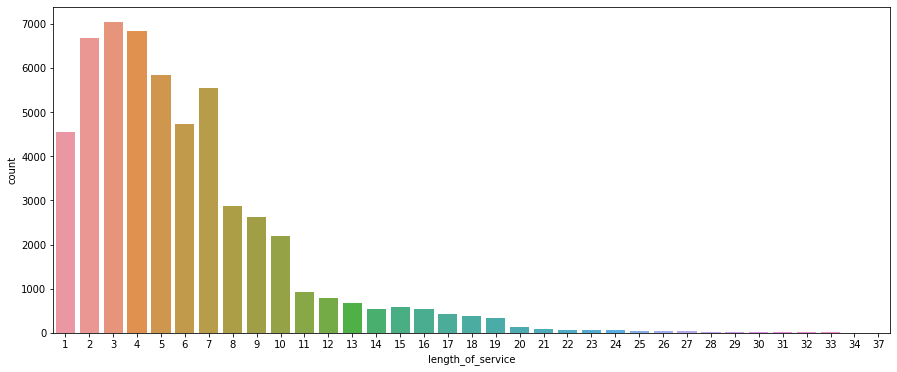

In [22]:
plt.subplots(figsize=(15,6))
sns.countplot(x='length_of_service', data=train_df)

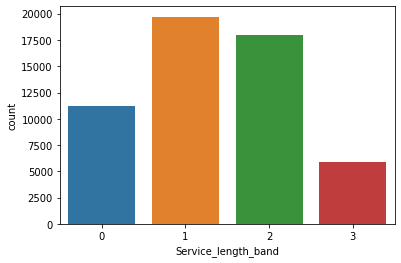

In [23]:
train_df['Service_length_band']=0
train_df.loc[train_df['length_of_service']<=2,'Service_length_band']=0
train_df.loc[(train_df['length_of_service']>2)&(train_df['length_of_service']<=5),'Service_length_band']=1
train_df.loc[(train_df['length_of_service']>5)&(train_df['length_of_service']<=10),'Service_length_band']=2
train_df.loc[train_df['length_of_service']>10,'Service_length_band']=3
sns.countplot(x='Service_length_band', data=train_df)

In [24]:
train_df['KPIs_met >80%'].value_counts()

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

In [25]:
train_df['awards_won?'].value_counts()

0    53538
1     1270
Name: awards_won?, dtype: int64

In [26]:
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Train_score_band,Service_length_band
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5,8,1,0,49,0,0,2
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5,4,0,0,60,0,1,1
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3,7,0,0,50,0,0,2
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1,10,0,0,50,0,0,2
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3,2,0,0,73,0,3,0


In [27]:
train_df.shape

(54808, 16)

In [28]:
X=np.zeros((54808, 16))
y=np.zeros((54808, 1))
X=train_df.iloc[:,0:16]
y=train_df['is_promoted']
X.drop(['is_promoted'],axis=1,inplace=True)

In [29]:
X.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Train_score_band,Service_length_band
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5,8,1,0,49,0,2
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5,4,0,0,60,1,1
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3,7,0,0,50,0,2
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1,10,0,0,50,0,2
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3,2,0,0,73,3,0


In [30]:
from sklearn.preprocessing import LabelEncoder
label_x = LabelEncoder()

In [31]:
X.iloc[:,1]=label_x.fit_transform(X.iloc[:,1])
X.iloc[:,2]=label_x.fit_transform(X.iloc[:,2])
X.iloc[:,3]=label_x.fit_transform(X.iloc[:,3])
X.iloc[:,4]=label_x.fit_transform(X.iloc[:,4])
X.iloc[:,5]=label_x.fit_transform(X.iloc[:,5])
X['previous_year_rating'] = X['previous_year_rating'].replace({'0': '0', '1': '1', '2': '2', '3': '3', '4': '4', '5': '5' })
X.shape

(54808, 15)

In [32]:
X.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Train_score_band,Service_length_band
0,65438,7,31,2,0,2,1,35,5,8,1,0,49,0,2
1,65141,4,14,0,1,0,1,30,5,4,0,0,60,1,1
2,7513,7,10,0,1,2,1,34,3,7,0,0,50,0,2
3,2542,7,15,0,1,0,2,39,1,10,0,0,50,0,2
4,48945,8,18,0,1,0,1,45,3,2,0,0,73,3,0


In [33]:
X['previous_year_rating'] = pd.to_numeric(X['previous_year_rating'])

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train.shape

(38365, 15)

In [35]:
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [36]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [38]:
 #A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [39]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [73]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='f1', n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X, y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  2.0min finished



 Time taken: 0 hours 2 minutes and 45.53 seconds.


In [74]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([20.80252886, 36.6167527 , 32.46114755, 23.66962028, 27.84523169]), 'std_fit_time': array([0.22515307, 0.03207771, 0.49408741, 0.63322378, 0.36719257]), 'mean_score_time': array([0.48770022, 1.10062846, 1.0971872 , 1.04594024, 0.83007137]), 'std_score_time': array([0.03685189, 0.07212746, 0.1446907 , 0.04613338, 0.04598538]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
         

In [37]:
from collections import Counter
# count examples in each class
counter = Counter(y)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 10.741


In [93]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1,
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.8, verbosity=1)

In [89]:
from sklearn.metrics import f1_score
def xgb_f1(y, t, threshold=0.5):
    t = t.get_label()
    y_bin = (y > threshold).astype(int) # works for both type(y) == <class 'numpy.ndarray'> and type(y) == <class 'pandas.core.series.Series'>
    return 'f1',f1_score(t,y_bin)

In [94]:
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric= xgb_f1 , eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.077297	validation_0-f1:0.179471
[1]	validation_0-error:0.07377	validation_0-f1:0.244237
[2]	validation_0-error:0.073223	validation_0-f1:0.26135
[3]	validation_0-error:0.073162	validation_0-f1:0.272232
[4]	validation_0-error:0.073223	validation_0-f1:0.258621
[5]	validation_0-error:0.072858	validation_0-f1:0.25958
[6]	validation_0-error:0.07304	validation_0-f1:0.264544
[7]	validation_0-error:0.072675	validation_0-f1:0.269113
[8]	validation_0-error:0.072432	validation_0-f1:0.27245
[9]	validation_0-error:0.072675	validation_0-f1:0.258225
[10]	validation_0-error:0.072554	validation_0-f1:0.260384
[11]	validation_0-error:0.072675	validation_0-f1:0.266421
[12]	validation_0-error:0.072554	validation_0-f1:0.266749
[13]	validation_0-error:0.072493	validation_0-f1:0.258706
[14]	validation_0-error:0.072493	validation_0-f1:0.248424
[15]	validation_0-error:0.072554	validation_0-f1:0.252974
[16]	validation_0-error:0.072554	validation_0-f1:0.246368
[17]	validation_0-error:0.072

[142]	validation_0-error:0.068297	validation_0-f1:0.326335
[143]	validation_0-error:0.067992	validation_0-f1:0.330539
[144]	validation_0-error:0.06781	validation_0-f1:0.333533
[145]	validation_0-error:0.06781	validation_0-f1:0.333533
[146]	validation_0-error:0.06781	validation_0-f1:0.333533
[147]	validation_0-error:0.067445	validation_0-f1:0.339488
[148]	validation_0-error:0.067628	validation_0-f1:0.336516
[149]	validation_0-error:0.067141	validation_0-f1:0.344418
[150]	validation_0-error:0.067141	validation_0-f1:0.344418
[151]	validation_0-error:0.067019	validation_0-f1:0.345606
[152]	validation_0-error:0.06708	validation_0-f1:0.344623
[153]	validation_0-error:0.06708	validation_0-f1:0.344623
[154]	validation_0-error:0.06708	validation_0-f1:0.344623
[155]	validation_0-error:0.06708	validation_0-f1:0.344623
[156]	validation_0-error:0.067019	validation_0-f1:0.345606
[157]	validation_0-error:0.067141	validation_0-f1:0.343639
[158]	validation_0-error:0.067019	validation_0-f1:0.344828
[159

[282]	validation_0-error:0.063431	validation_0-f1:0.400919
[283]	validation_0-error:0.063492	validation_0-f1:0.4
[284]	validation_0-error:0.063492	validation_0-f1:0.4
[285]	validation_0-error:0.063492	validation_0-f1:0.4
[286]	validation_0-error:0.063431	validation_0-f1:0.400919
[287]	validation_0-error:0.063431	validation_0-f1:0.400919
[288]	validation_0-error:0.063431	validation_0-f1:0.400919
[289]	validation_0-error:0.063431	validation_0-f1:0.400919
[290]	validation_0-error:0.063431	validation_0-f1:0.400919
[291]	validation_0-error:0.063431	validation_0-f1:0.400919
[292]	validation_0-error:0.063492	validation_0-f1:0.400689
[293]	validation_0-error:0.063492	validation_0-f1:0.400689
[294]	validation_0-error:0.063431	validation_0-f1:0.400919
[295]	validation_0-error:0.06331	validation_0-f1:0.403438
[296]	validation_0-error:0.06331	validation_0-f1:0.403438
[297]	validation_0-error:0.063249	validation_0-f1:0.404353
[298]	validation_0-error:0.06331	validation_0-f1:0.403438
[299]	validatio

[422]	validation_0-error:0.060086	validation_0-f1:0.45172
[423]	validation_0-error:0.060086	validation_0-f1:0.45172
[424]	validation_0-error:0.060086	validation_0-f1:0.45172
[425]	validation_0-error:0.060086	validation_0-f1:0.45172
[426]	validation_0-error:0.059965	validation_0-f1:0.453437
[427]	validation_0-error:0.060026	validation_0-f1:0.452579
[428]	validation_0-error:0.060086	validation_0-f1:0.45172
[429]	validation_0-error:0.060086	validation_0-f1:0.45172
[430]	validation_0-error:0.060026	validation_0-f1:0.452579
[431]	validation_0-error:0.060026	validation_0-f1:0.452579
[432]	validation_0-error:0.060026	validation_0-f1:0.452579
[433]	validation_0-error:0.060026	validation_0-f1:0.452579
[434]	validation_0-error:0.060086	validation_0-f1:0.45172
[435]	validation_0-error:0.060086	validation_0-f1:0.45172
[436]	validation_0-error:0.059965	validation_0-f1:0.453437
[437]	validation_0-error:0.059965	validation_0-f1:0.453437
[438]	validation_0-error:0.059965	validation_0-f1:0.453437
[439]

[562]	validation_0-error:0.058627	validation_0-f1:0.473224
[563]	validation_0-error:0.058627	validation_0-f1:0.473224
[564]	validation_0-error:0.058627	validation_0-f1:0.473224
[565]	validation_0-error:0.058627	validation_0-f1:0.473224
[566]	validation_0-error:0.058627	validation_0-f1:0.473224
[567]	validation_0-error:0.058627	validation_0-f1:0.473224
[568]	validation_0-error:0.058627	validation_0-f1:0.473224
[569]	validation_0-error:0.058627	validation_0-f1:0.473224
[570]	validation_0-error:0.058627	validation_0-f1:0.473224
[571]	validation_0-error:0.058627	validation_0-f1:0.473224
[572]	validation_0-error:0.058627	validation_0-f1:0.473224
[573]	validation_0-error:0.058627	validation_0-f1:0.473224
[574]	validation_0-error:0.058627	validation_0-f1:0.473224
[575]	validation_0-error:0.058627	validation_0-f1:0.473224
[576]	validation_0-error:0.058627	validation_0-f1:0.473224
[577]	validation_0-error:0.058627	validation_0-f1:0.473224
[578]	validation_0-error:0.058566	validation_0-f1:0.4740

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1,
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.8, verbosity=1)

In [95]:
y_pred = model.predict(X_test)

In [96]:
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15061
           1       0.96      0.32      0.48      1382

    accuracy                           0.94     16443
   macro avg       0.95      0.66      0.72     16443
weighted avg       0.94      0.94      0.93     16443



In [82]:
print(roc_auc_score(y_test, y_pred))

0.6582966125887864


In [108]:
test_df['education'] = test_df['education'].replace(np.nan, 'Unknown', regex=True)
test_df['previous_year_rating'] = test_df['previous_year_rating'].replace(np.nan, '0', regex=True)

test_df['Train_score_band']=0
test_df.loc[test_df['avg_training_score']<=50,'Train_score_band']=0
test_df.loc[(test_df['avg_training_score']>50)&(test_df['avg_training_score']<=60),'Train_score_band']=1
test_df.loc[(test_df['avg_training_score']>60)&(test_df['avg_training_score']<=70),'Train_score_band']=2
test_df.loc[(test_df['avg_training_score']>70)&(test_df['avg_training_score']<=80),'Train_score_band']=3
test_df.loc[test_df['avg_training_score']>80,'Train_score_band']=4

test_df['Service_length_band']=0
test_df.loc[test_df['length_of_service']<=2,'Service_length_band']=0
test_df.loc[(test_df['length_of_service']>2)&(test_df['length_of_service']<=5),'Service_length_band']=1
test_df.loc[(test_df['length_of_service']>5)&(test_df['length_of_service']<=10),'Service_length_band']=2
test_df.loc[test_df['length_of_service']>10,'Service_length_band']=3

test_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Train_score_band,Service_length_band
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,0,1,1,0,77,3,0
1,74430,HR,region_4,Bachelor's,f,other,1,31,3,5,0,0,51,1,1
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1,4,0,0,47,0,1
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2,9,0,0,65,2,2
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4,7,0,0,61,2,2


In [109]:
test_df.iloc[:,1]=label_x.fit_transform(test_df.iloc[:,1])
test_df.iloc[:,2]=label_x.fit_transform(test_df.iloc[:,2])
test_df.iloc[:,3]=label_x.fit_transform(test_df.iloc[:,3])
test_df.iloc[:,4]=label_x.fit_transform(test_df.iloc[:,4])
test_df.iloc[:,5]=label_x.fit_transform(test_df.iloc[:,5])
test_df['previous_year_rating'] = test_df['previous_year_rating'].replace({'0': '0', '1': '1', '2': '2', '3': '3', '4': '4', '5': '5' })
test_df['previous_year_rating'] = pd.to_numeric(test_df['previous_year_rating'])
test_df.shape

(23490, 15)

In [98]:
yt_pred = model.predict(test_df)

In [99]:
yt_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [100]:
submission = pd.DataFrame({ "employee_id": test_df["employee_id"],
                            "is_promoted": yt_pred })
submission.to_csv('submission_2.csv', index=False)

## LightGBM

In [39]:
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb

In [76]:
 #A parameter grid for LightGBM
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
params = {
            'n_estimators': [400, 700, 1000],
            'colsample_bytree': [0.7, 0.8],
            'max_depth': [15,20,25],
            'num_leaves': [50, 100, 200],
            'reg_alpha': [1.1, 1.2, 1.3],
            'reg_lambda': [1.1, 1.2, 1.3],
            'min_split_gain': [0.3, 0.4],
            'subsample': [0.7, 0.8, 0.9],
            'subsample_freq': [20]
        }

In [77]:
model = lgb.LGBMClassifier(learning_rate=0.01, n_estimators=5000, objective='binary',
                    silent=True, nthread=1)

In [85]:
# To calculate F1 score
from sklearn.metrics import f1_score

def lgb_f1(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True

In [79]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=param_comb, scoring='f1', n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X, y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:   24.9s finished



 Time taken: 0 hours 0 minutes and 32.2 seconds.


In [81]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('lgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([7.96849068, 3.05854789, 6.88932316, 3.25268833, 3.32947135]), 'std_fit_time': array([0.06168961, 0.19457104, 0.17209937, 0.77452466, 0.10249051]), 'mean_score_time': array([2.76908565, 0.42722805, 2.57717482, 0.34774232, 0.364844  ]), 'std_score_time': array([0.0390867 , 0.09293998, 0.02508299, 0.0188098 , 0.01987662]), 'param_subsample_freq': masked_array(data=[20, 20, 20, 20, 20],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_subsample': masked_array(data=[0.8, 0.8, 0.9, 0.8, 0.9],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_reg_lambda': masked_array(data=[1.3, 1.3, 1.1, 1.3, 1.3],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_reg_alpha': masked_array(data=[1.3, 1.2, 1.2, 1.3, 1.3],
             mask=[False, False, False, False, False],
       fill

In [162]:
model_params = {'boosting_type':'gbdt', 'scale_pos_weight':2, 'colsample_bytree':0.7,
                   'importance_type':'split', 'learning_rate':0.01, 'max_depth':15,
                   'min_child_samples':20, 'min_child_weight':0.001, 'min_split_gain':0.3,
                   'n_estimators':1000, 'n_jobs':-1, 'nthread':1, 'num_leaves':200,
                   'objective':'binary', 'random_state':'None', 'reg_alpha':1.2,
                   'reg_lambda':1.1, 'silent':True, 'subsample':0.9,
                   'subsample_for_bin':200000, 'subsample_freq':20, 'metric':'f1',"seed": 120}
model_param = {
    "objective" : "binary",
       "n_estimators":10000,
       "reg_alpha" : 0.1,
       "reg_lambda":0.1,
       "n_jobs":-1,
       "colsample_bytree":.8,
       "min_child_weight":8,
       "subsample":0.8715623,
       "min_data_in_leaf":100,
       "nthread":4,
       "metric" : "f1",
       "num_leaves" : 600,
       "learning_rate" : 0.01,
       "verbosity" : -1,
       "seed": 120,
       "max_bin":60,
       'max_depth':15,
       'min_gain_to_split':.0222415,
       'scale_pos_weight':2
}

In [157]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
evals_result = {}
gbm = lgb.train(model_params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                feval=lgb_f1, 
                evals_result=evals_result)

[1]	valid_0's f1: 0
[2]	valid_0's f1: 0
[3]	valid_0's f1: 0
[4]	valid_0's f1: 0
[5]	valid_0's f1: 0
[6]	valid_0's f1: 0
[7]	valid_0's f1: 0
[8]	valid_0's f1: 0
[9]	valid_0's f1: 0
[10]	valid_0's f1: 0
[11]	valid_0's f1: 0
[12]	valid_0's f1: 0
[13]	valid_0's f1: 0
[14]	valid_0's f1: 0
[15]	valid_0's f1: 0
[16]	valid_0's f1: 0
[17]	valid_0's f1: 0
[18]	valid_0's f1: 0
[19]	valid_0's f1: 0
[20]	valid_0's f1: 0
[21]	valid_0's f1: 0
[22]	valid_0's f1: 0
[23]	valid_0's f1: 0
[24]	valid_0's f1: 0
[25]	valid_0's f1: 0
[26]	valid_0's f1: 0
[27]	valid_0's f1: 0
[28]	valid_0's f1: 0
[29]	valid_0's f1: 0
[30]	valid_0's f1: 0
[31]	valid_0's f1: 0
[32]	valid_0's f1: 0
[33]	valid_0's f1: 0
[34]	valid_0's f1: 0
[35]	valid_0's f1: 0
[36]	valid_0's f1: 0
[37]	valid_0's f1: 0
[38]	valid_0's f1: 0
[39]	valid_0's f1: 0
[40]	valid_0's f1: 0
[41]	valid_0's f1: 0
[42]	valid_0's f1: 0
[43]	valid_0's f1: 0
[44]	valid_0's f1: 0
[45]	valid_0's f1: 0
[46]	valid_0's f1: 0
[47]	valid_0's f1: 0
[48]	valid_0's f1: 0
[

[303]	valid_0's f1: 0.5
[304]	valid_0's f1: 0.500782
[305]	valid_0's f1: 0.501826
[306]	valid_0's f1: 0.501826
[307]	valid_0's f1: 0.501564
[308]	valid_0's f1: 0.501044
[309]	valid_0's f1: 0.501305
[310]	valid_0's f1: 0.501564
[311]	valid_0's f1: 0.501564
[312]	valid_0's f1: 0.501564
[313]	valid_0's f1: 0.501564
[314]	valid_0's f1: 0.501564
[315]	valid_0's f1: 0.501564
[316]	valid_0's f1: 0.501303
[317]	valid_0's f1: 0.50442
[318]	valid_0's f1: 0.505711
[319]	valid_0's f1: 0.505449
[320]	valid_0's f1: 0.505711
[321]	valid_0's f1: 0.504935
[322]	valid_0's f1: 0.504935
[323]	valid_0's f1: 0.506224
[324]	valid_0's f1: 0.506998
[325]	valid_0's f1: 0.506998
[326]	valid_0's f1: 0.507509
[327]	valid_0's f1: 0.507509
[328]	valid_0's f1: 0.508282
[329]	valid_0's f1: 0.508282
[330]	valid_0's f1: 0.508282
[331]	valid_0's f1: 0.508282
[332]	valid_0's f1: 0.508282
[333]	valid_0's f1: 0.508019
[334]	valid_0's f1: 0.507494
[335]	valid_0's f1: 0.507494
[336]	valid_0's f1: 0.507494
[337]	valid_0's f1: 

[591]	valid_0's f1: 0.511628
[592]	valid_0's f1: 0.512111
[593]	valid_0's f1: 0.512364
[594]	valid_0's f1: 0.512364
[595]	valid_0's f1: 0.511858
[596]	valid_0's f1: 0.512364
[597]	valid_0's f1: 0.512364
[598]	valid_0's f1: 0.511858
[599]	valid_0's f1: 0.512111
[600]	valid_0's f1: 0.512593
[601]	valid_0's f1: 0.512111
[602]	valid_0's f1: 0.51234
[603]	valid_0's f1: 0.51234
[604]	valid_0's f1: 0.511582
[605]	valid_0's f1: 0.511582
[606]	valid_0's f1: 0.509862
[607]	valid_0's f1: 0.509611
[608]	valid_0's f1: 0.511834
[609]	valid_0's f1: 0.510848
[610]	valid_0's f1: 0.510848
[611]	valid_0's f1: 0.510848
[612]	valid_0's f1: 0.510848
[613]	valid_0's f1: 0.5111
[614]	valid_0's f1: 0.5111
[615]	valid_0's f1: 0.511352
[616]	valid_0's f1: 0.511352
[617]	valid_0's f1: 0.5111
[618]	valid_0's f1: 0.5111
[619]	valid_0's f1: 0.510848
[620]	valid_0's f1: 0.51133
[621]	valid_0's f1: 0.51133
[622]	valid_0's f1: 0.51133
[623]	valid_0's f1: 0.511582
[624]	valid_0's f1: 0.512087
[625]	valid_0's f1: 0.5111


[879]	valid_0's f1: 0.515034
[880]	valid_0's f1: 0.515284
[881]	valid_0's f1: 0.515284
[882]	valid_0's f1: 0.515754
[883]	valid_0's f1: 0.515534
[884]	valid_0's f1: 0.515534
[885]	valid_0's f1: 0.515534
[886]	valid_0's f1: 0.515784
[887]	valid_0's f1: 0.516035
[888]	valid_0's f1: 0.517225
[889]	valid_0's f1: 0.516974
[890]	valid_0's f1: 0.516723
[891]	valid_0's f1: 0.516723
[892]	valid_0's f1: 0.516473
[893]	valid_0's f1: 0.516473
[894]	valid_0's f1: 0.517191
[895]	valid_0's f1: 0.517191
[896]	valid_0's f1: 0.517191
[897]	valid_0's f1: 0.517191
[898]	valid_0's f1: 0.51816
[899]	valid_0's f1: 0.517442
[900]	valid_0's f1: 0.517191
[901]	valid_0's f1: 0.517191
[902]	valid_0's f1: 0.517191
[903]	valid_0's f1: 0.517442
[904]	valid_0's f1: 0.517191
[905]	valid_0's f1: 0.517909
[906]	valid_0's f1: 0.517658
[907]	valid_0's f1: 0.517658
[908]	valid_0's f1: 0.51816
[909]	valid_0's f1: 0.518411
[910]	valid_0's f1: 0.518411
[911]	valid_0's f1: 0.518411
[912]	valid_0's f1: 0.518411
[913]	valid_0's 

In [160]:
pred_test_y = gbm.predict(X_test)

In [161]:
pred_test_y

array([9.73323279e-04, 1.40193490e-03, 9.70865074e-03, ...,
       3.42269117e-04, 2.14731019e-01, 4.53512932e-01])

In [163]:
model = lgb.LGBMClassifier(**model_params)

In [164]:
model.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.7,
               importance_type='split', learning_rate=0.01, max_depth=15,
               metric='f1', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.3, n_estimators=1000, n_jobs=-1, nthread=1,
               num_leaves=200, objective='binary', random_state='None',
               reg_alpha=1.2, reg_lambda=1.1, scale_pos_weight=2, seed=120,
               silent=True, subsample=0.9, subsample_for_bin=200000,
               subsample_freq=20)

In [165]:
prob_test = model.predict(X_test)

In [166]:
prob_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [167]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [168]:
print(classification_report(y_test, prob_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     15061
           1       0.78      0.39      0.52      1382

    accuracy                           0.94     16443
   macro avg       0.86      0.69      0.74     16443
weighted avg       0.93      0.94      0.93     16443



In [169]:
y_pred_lgb = model.predict(test_df)

In [170]:
y_pred_lgb

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [171]:
submission = pd.DataFrame({ "employee_id": test_df["employee_id"],
                            "is_promoted": y_pred_lgb })
submission.to_csv('submission_lgb2.csv', index=False)